In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

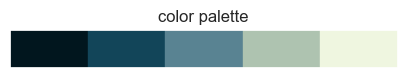

In [2]:
sns.set()
c_pal = ["#01161e","#124559","#598392","#aec3b0","#eff6e0"]
fig, ax = plt.subplots(figsize=(5, 0.5))
for i, color in enumerate(c_pal):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(c_pal))
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.title('color palette')
plt.show();

In [3]:
atw = pd.read_csv('data/AllThemWitches.csv')

In [4]:
atw = atw[['id', 'name', 'album_name', 'album_release_date', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature', 'valence', 'explicit']].copy()

In [5]:
atw.columns

Index(['id', 'name', 'album_name', 'album_release_date', 'duration_ms',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'valence', 'explicit'],
      dtype='object')

### What do all these audio features mean?

Let's have a look at the [Spotify Web API documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

**popularity**
The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

**duration_ms**
The duration of the track in milliseconds.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**explicit**
Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

In [6]:
atw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  101 non-null    object 
 1   name                101 non-null    object 
 2   album_name          101 non-null    object 
 3   album_release_date  101 non-null    object 
 4   duration_ms         101 non-null    int64  
 5   popularity          101 non-null    int64  
 6   danceability        101 non-null    float64
 7   energy              101 non-null    float64
 8   key                 101 non-null    int64  
 9   loudness            101 non-null    float64
 10  mode                101 non-null    int64  
 11  speechiness         101 non-null    float64
 12  acousticness        101 non-null    float64
 13  instrumentalness    101 non-null    float64
 14  liveness            101 non-null    float64
 15  tempo               101 non-null    float64
 16  time_sig

In [7]:
atw.shape

(101, 19)

In [8]:
unique_songs_per_album = atw.groupby('album_name')['id'].nunique().sort_values(ascending=False)
unique_songs_per_album

album_name
Live On The Internet                    16
Live In Brussels                        14
Our Mother Electricity                  10
Lightning At The Door                   10
Dying Surfer Meets His Maker             9
Sleeping Through The War                 8
ATW                                      8
Nothing as the Ideal                     8
At the Garage                            7
Tiger's Pit                              1
Slow City                                1
Silver To Rust                           1
Real Hippies Are Cowboys                 1
6969 WXL THE CAGE                        1
Mama Is a Shining Star                   1
L'hotel Serein                           1
Hush, I'm on TV                          1
Holding Your Breath Across the River     1
Acid Face                                1
Tour Death Song                          1
Name: id, dtype: int64

I'll remove all songs from the live albums because these are actually duplicates:

In [9]:
atw = atw[~atw['album_name'].isin(['Live On The Internet', 'Live In Brussels', 'At the Garage'])].copy()

Let's check the most and least popular songs of All Them Witches on Spotify:

In [10]:
top_10_songs = atw.nlargest(15, 'popularity')[['name', 'album_name', 'popularity']]
top_10_songs

,name,album_name,popularity
71,When God Comes Back,Lightning At The Door,54
17,Enemy of My Enemy,Nothing as the Ideal,49
72,The Marriage Of Coyote Woman,Lightning At The Door,49
20,The Children of Coyote Woman,Nothing as the Ideal,48
36,Am I Going Up?,Sleeping Through The War,48
28,Diamond,ATW,46
21,41,Nothing as the Ideal,45
35,3-5-7,Sleeping Through The War,44
74,Charles William,Lightning At The Door,44
84,Elk.Blood.Heart,Our Mother Electricity,43


In [11]:
bottom_10_songs = atw.nsmallest(15, 'popularity')[['name', 'album_name', 'popularity']]
bottom_10_songs

,name,album_name,popularity
60,Instrumental 2 (Welcome To The Caveman Future),Dying Surfer Meets His Maker,21
58,Mellowing,Dying Surfer Meets His Maker,22
55,El Centro,Dying Surfer Meets His Maker,23
56,Dirt Preachers,Dying Surfer Meets His Maker,23
57,This Is Where It Falls Apart,Dying Surfer Meets His Maker,23
59,Open Passageways,Dying Surfer Meets His Maker,23
61,Talisman,Dying Surfer Meets His Maker,23
54,Call Me Star,Dying Surfer Meets His Maker,24
62,Blood And Sand / Milk And Endless Waters,Dying Surfer Meets His Maker,24
91,Mama Is a Shining Star,Mama Is a Shining Star,24


The entire album 'Dying Surfer Meets His Maker' is very unpopular. That's strange. (I like it and don't think it's any worse than the other albums. This must have other reasons.)

### valence

The first thing that I'm interested in is the valence value. Remember: It's a value between 0 and 1 while 0 means negative (sad, depressed, angry, etc.) and 1 means positive (happy, cheerful, euphoric, etc.). I assume that the values for this band will be closer to 0...

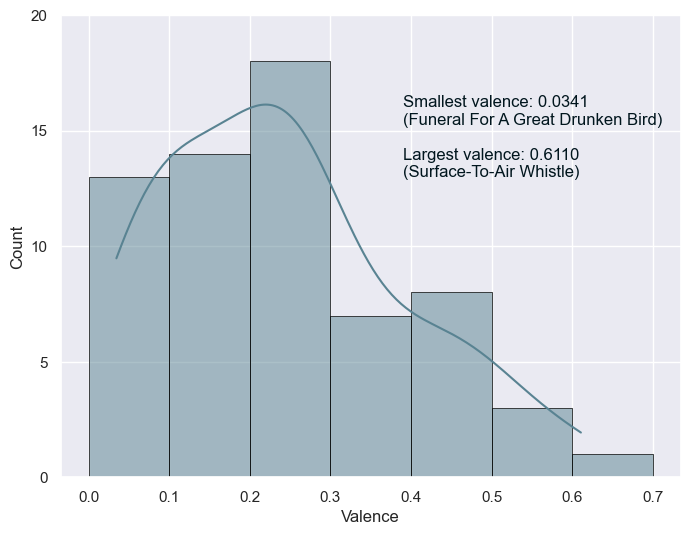

In [12]:
bin_boundaries = np.arange(0, 0.8, 0.1)

plt.figure(figsize=(8, 6))
sns.histplot(atw['valence'], kde=True, color='#598392', edgecolor='black', linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.yticks(np.arange(0, 21, 5)) 
plt.grid(True)
plt.text(0.39, 13, f"Smallest valence: {atw['valence'].min():.4f} \n({atw.loc[atw['valence'].idxmin(), 'name']})\n\nLargest valence: {atw['valence'].max():.4f} \n({atw.loc[atw['valence'].idxmax(), 'name']})", color='#01161e')

plt.show()

Indeed, the mood of the songs is rather gloomy.